In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.image as mpimg
import math

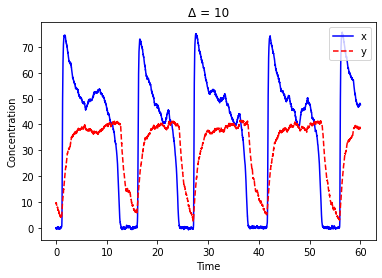

In [2]:
### Design 1 with added noise

D = 1 #controls magnitude of noise

Tmax = 60
dt = 0.01
t = np.linspace(0,Tmax, int(Tmax/dt))

x = np.zeros(len(t))
y = np.zeros(len(t))

y[0] = 10

xi = 0.05
xix = 1.58
xiy = xix*xi

rho = 50
sigma = 1
delta = 10

for i in range(len(t)-1):
    eta = np.random.randn()
    kx1 = delta*(xix*(1+rho*x[i]**2)/(1+x[i]**2+sigma*y[i]**2)-x[i])
    ky1 = delta*xiy*(1+rho*x[i]**2)/(1+x[i]**2)-y[i]
    ax = x[i] + kx1*dt + math.sqrt(2*D*dt)*eta
    ay = y[i] + ky1*dt + math.sqrt(2*D*dt)*eta

    kx2 = delta*(xix*(1+rho*ax**2)/(1+ax**2+sigma*ay**2)-ax)
    ky2 = delta*xiy*(1+rho*ax**2)/(1+ax**2)-ay
    x[i+1] = x[i] + (kx1+kx2)*dt/2 + math.sqrt(2*D*dt)*eta
    y[i+1] = y[i] + (ky1+ky2)*dt/2 + math.sqrt(2*D*dt)*eta

f = plt.figure()
plt.plot(t, x, "-b")
plt.plot(t, y, "--r")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("\u0394 = " + str(delta))
plt.legend(["x", "y"], loc = "upper right")
plt.show()
plt.close()


In [3]:
#nullcline calculation
#x nullcline

def xnull(x):
   # print(x)
   # print((xix/x*(1+rho*x**2)-x**2-1)/sigma)
   return math.sqrt((xix/x*(1+rho*x**2)-x**2-1)/sigma)

#y nullcline
def ynull(x):
   return delta*xiy*(1+rho*x**2)/(1+x**2)


xr = np.linspace(.001, 78.98, 10000)



xnullcline = []
ynullcline = []

#x nullcline main
for X in xr:
    xnullcline.append(xnull(X))
    ynullcline.append(ynull(X))




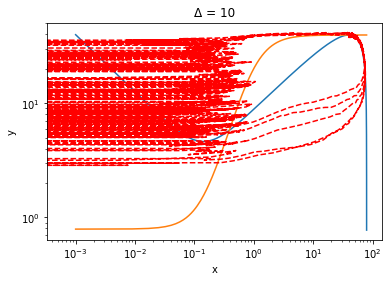

In [4]:
f = plt.figure()
plt.plot(xr, xnullcline)
plt.plot(xr, ynullcline)
plt.xlabel("x")
plt.ylabel("y")
plt.title("\u0394 = " + str(delta))
plt.plot(x,y, "--r")
plt.yscale('log')
plt.xscale('log')
plt.show()
plt.close()


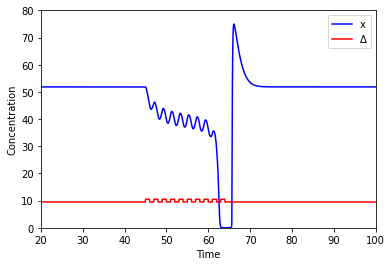

In [5]:
#design 1 with pulses in delta, see fig 3 of Dynamical Principles of Two-Component Genetic Oscillators
Tmax = 100
dt = 0.01
t = np.linspace(0,Tmax, int(Tmax/dt))

pulse_dur = 1
pulse_count = 10
pulse_amp = 1
pulse_start = int(45//dt)

x = np.zeros(len(t))
y = np.zeros(len(t))

y[0] = 10
x[0] = 52
xi = 0.05
xix = 1.58
xiy = xix*xi

rho = 50
sigma = 1

delta = 9.5
delta_arr = np.zeros(len(t)) + delta

dd = np.zeros(int(pulse_dur/dt)) + delta + pulse_amp

for j in range(pulse_count):
    start = pulse_start + int(2*j//dt)
    pulse = np.arange(start, int(start + pulse_dur/dt))
    np.put(delta_arr, pulse, dd, mode='raise')

for i in range(len(t)-1):
    kx1 = delta_arr[i]*(xix*(1+rho*x[i]**2)/(1+x[i]**2+sigma*y[i]**2)-x[i])
    ky1 = delta_arr[i]*xiy*(1+rho*x[i]**2)/(1+x[i]**2)-y[i]
    ax = x[i] + kx1*dt
    ay = y[i] + ky1*dt

    kx2 = delta_arr[i]*(xix*(1+rho*ax**2)/(1+ax**2+sigma*ay**2)-ax)
    ky2 = delta_arr[i]*xiy*(1+rho*ax**2)/(1+ax**2)-ay
    x[i+1] = x[i] + (kx1+kx2)*dt/2
    y[i+1] = y[i] + (ky1+ky2)*dt/2

f = plt.figure()
plt.plot(t, x, "-b")
plt.plot(t, delta_arr, '-r')
# plt.plot(t, y, "--g")
plt.xlabel("Time")
plt.xlim(20, 100)
plt.ylim(0,80)
plt.ylabel("Concentration")
plt.legend(["x", "\u0394"], loc = 'upper right')
# plt.title("\u0394 = " + str(delta))
plt.show()
plt.close()


plt.show()
plt.close()